In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.seasonal import seasonal_decompose

#  Addition method for time series analysis

In [2]:
data=pd.read_csv('real time example of air quality index in del.csv')
data

,Date,AQI
0,31-1-21,324.0
1,28-2-21,288.0
2,31-3-21,223.0
3,30-4-21,202.0
4,31-5-21,146.0
5,30-6-21,147.0
6,31-7-21,110.0
7,31-8-21,107.0
8,30-9-21,78.0
9,31-10-21,173.0


In [3]:
data.columns=['Date','AQI']

In [4]:
data

,Date,AQI
0,31-1-21,324.0
1,28-2-21,288.0
2,31-3-21,223.0
3,30-4-21,202.0
4,31-5-21,146.0
5,30-6-21,147.0
6,31-7-21,110.0
7,31-8-21,107.0
8,30-9-21,78.0
9,31-10-21,173.0


In [5]:
data.isnull().sum()

Date    0
AQI     0
dtype: int64

In [6]:
data['Date']=pd.to_datetime(data['Date'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_7696\1428478067.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date']=pd.to_datetime(data['Date'])


In [7]:
data.index=data['Date']

In [8]:
data=data.drop(columns=['Date'])

In [9]:
data

,AQI
Date,
2021-01-31,324.0
2021-02-28,288.0
2021-03-31,223.0
2021-04-30,202.0
2021-05-31,146.0
2021-06-30,147.0
2021-07-31,110.0
2021-08-31,107.0
2021-09-30,78.0


In [10]:
result=seasonal_decompose(data['AQI'])

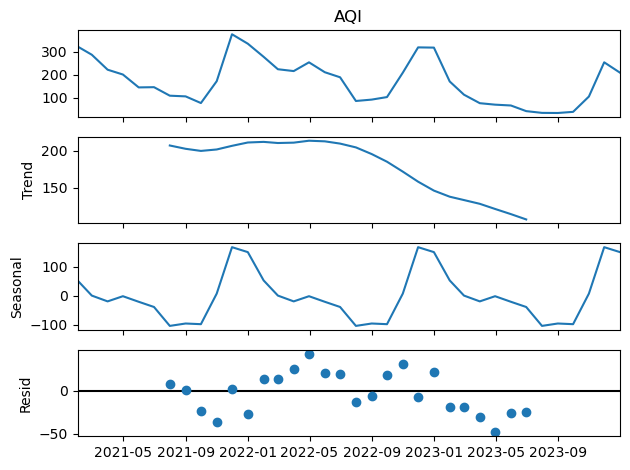

In [11]:
result.plot()
plt.show()

In [12]:
data['dt']=data.index

In [13]:
data['dt']=pd.to_datetime(data['dt'])

In [14]:
train=data[data['dt'].dt.year<2023]
test=data[data['dt'].dt.year>2022]

In [15]:
train.drop(columns=['dt'], inplace = True)
test.drop(columns=['dt'], inplace = True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_7696\4112128423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(columns=['dt'], inplace = True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_7696\4112128423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(columns=['dt'], inplace = True)


In [16]:
model=LinearRegression()

In [17]:
train.shape

(24, 1)

In [18]:
test.shape

(12, 1)

In [19]:
np.array(range(1,25))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [20]:
train_model = pd.DataFrame(range(1,25), columns=['X'])
train_model['Y'] = train['AQI'].values

In [21]:
train_model

,X,Y
0,1,324.0
1,2,288.0
2,3,223.0
3,4,202.0
4,5,146.0
5,6,147.0
6,7,110.0
7,8,107.0
8,9,78.0
9,10,173.0


In [22]:
model.fit(train_model[['X']], train_model['Y'])

LinearRegression()

In [23]:
train_model['linear_pred_Trend'] = model.predict(train_model[['X']])

<Axes: >

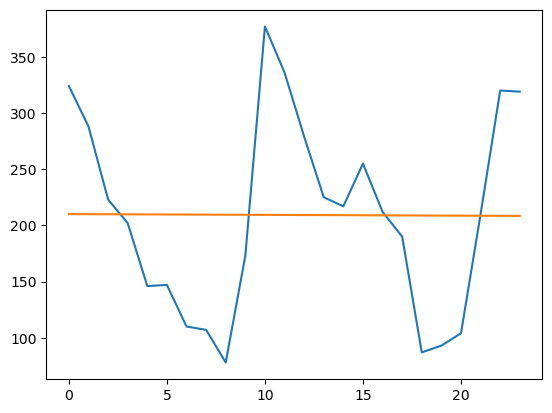

In [24]:
train_model['Y'].plot(kind = 'line')
train_model['linear_pred_Trend'].plot(kind = 'line')

In [25]:
train_model['linear_SI'] = train_model['Y'] - train_model['linear_pred_Trend']

In [26]:
train_model

,X,Y,linear_pred_Trend,linear_SI
0,1,324.0,210.050000,113.950000
1,2,288.0,209.980435,78.019565
2,3,223.0,209.910870,13.089130
3,4,202.0,209.841304,-7.841304
4,5,146.0,209.771739,-63.771739
5,6,147.0,209.702174,-62.702174
6,7,110.0,209.632609,-99.632609
7,8,107.0,209.563043,-102.563043
8,9,78.0,209.493478,-131.493478
9,10,173.0,209.423913,-36.423913


In [27]:
train_model['Month_component'] =2*list(range(1,13)) 

In [28]:
train_model_seasonal_monthly_component = train_model.groupby('Month_component')['linear_SI'].mean()

In [29]:
train_model_seasonal_monthly_component

Month_component
1      91.867391
2      46.936957
3      10.506522
4      19.076087
5     -30.354348
6     -40.784783
7    -110.715217
8    -109.145652
9    -118.076087
10    -17.506522
11    139.563043
12    118.632609
Name: linear_SI, dtype: float64

In [30]:
train_model

,X,Y,linear_pred_Trend,linear_SI,Month_component
0,1,324.0,210.050000,113.950000,1
1,2,288.0,209.980435,78.019565,2
2,3,223.0,209.910870,13.089130,3
3,4,202.0,209.841304,-7.841304,4
4,5,146.0,209.771739,-63.771739,5
5,6,147.0,209.702174,-62.702174,6
6,7,110.0,209.632609,-99.632609,7
7,8,107.0,209.563043,-102.563043,8
8,9,78.0,209.493478,-131.493478,9
9,10,173.0,209.423913,-36.423913,10


In [31]:
Average_Seasonality_Factor = pd.DataFrame(train_model_seasonal_monthly_component[train_model['Month_component']]).reset_index()

In [32]:
Average_Seasonality_Factor.columns = ["Month_component", "Average_Seasonality_Factor"]

In [33]:
Average_Seasonality_Factor

,Month_component,Average_Seasonality_Factor
0,1,91.867391
1,2,46.936957
2,3,10.506522
3,4,19.076087
4,5,-30.354348
5,6,-40.784783
6,7,-110.715217
7,8,-109.145652
8,9,-118.076087
9,10,-17.506522


In [34]:
train_model['Average_Seasonality_Factor'] = Average_Seasonality_Factor['Average_Seasonality_Factor']

In [35]:
train_model

,X,Y,linear_pred_Trend,linear_SI,Month_component,Average_Seasonality_Factor
0,1,324.0,210.050000,113.950000,1,91.867391
1,2,288.0,209.980435,78.019565,2,46.936957
2,3,223.0,209.910870,13.089130,3,10.506522
3,4,202.0,209.841304,-7.841304,4,19.076087
4,5,146.0,209.771739,-63.771739,5,-30.354348
5,6,147.0,209.702174,-62.702174,6,-40.784783
6,7,110.0,209.632609,-99.632609,7,-110.715217
7,8,107.0,209.563043,-102.563043,8,-109.145652
8,9,78.0,209.493478,-131.493478,9,-118.076087
9,10,173.0,209.423913,-36.423913,10,-17.506522


In [36]:
train_model['Actual_Prediction'] = train_model['linear_pred_Trend'] + train_model['Average_Seasonality_Factor']

In [37]:
train_model

,X,Y,linear_pred_Trend,linear_SI,Month_component,Average_Seasonality_Factor,Actual_Prediction
0,1,324.0,210.050000,113.950000,1,91.867391,301.917391
1,2,288.0,209.980435,78.019565,2,46.936957,256.917391
2,3,223.0,209.910870,13.089130,3,10.506522,220.417391
3,4,202.0,209.841304,-7.841304,4,19.076087,228.917391
4,5,146.0,209.771739,-63.771739,5,-30.354348,179.417391
5,6,147.0,209.702174,-62.702174,6,-40.784783,168.917391
6,7,110.0,209.632609,-99.632609,7,-110.715217,98.917391
7,8,107.0,209.563043,-102.563043,8,-109.145652,100.417391
8,9,78.0,209.493478,-131.493478,9,-118.076087,91.417391
9,10,173.0,209.423913,-36.423913,10,-17.506522,191.917391


In [38]:
print("Linear Prediction MAPE : ")
print(mean_absolute_percentage_error(train_model['Y'],train_model['linear_pred_Trend'] ))
print("Linear with Seasonality Prediction MAPE")
print(mean_absolute_percentage_error(train_model['Y'],train_model['Actual_Prediction'] ))

Linear Prediction MAPE : 
0.46539457972949133
Linear with Seasonality Prediction MAPE
0.09913253586350483


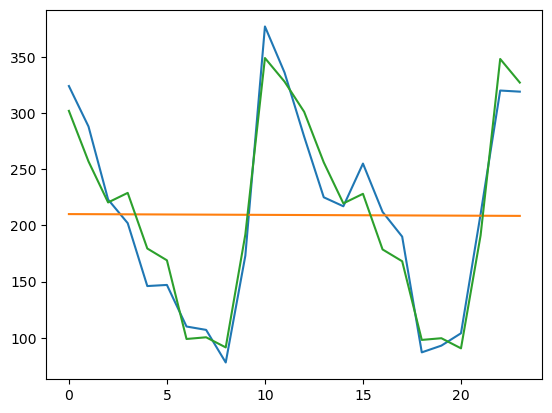

In [39]:
train_model['Y'].plot(kind = 'line')
train_model['linear_pred_Trend'].plot(kind = 'line')
train_model['Actual_Prediction'].plot(kind = 'line')
plt.show()

In [40]:
model1=LinearRegression()

In [41]:
test_model = pd.DataFrame(range(25,37), columns=['X'])
test_model['Y'] = test['AQI'].values

In [42]:
test_model

,X,Y
0,25,171.8
1,26,114.3
2,27,77.4
3,28,71.0
4,29,67.4
5,30,42.9
6,31,35.3
7,32,34.8
8,33,39.7
9,34,106.3


In [43]:
model1.fit(test_model[['X']], test_model['Y'])

LinearRegression()

In [44]:
test_model['linear_pred_Trend_test'] = model1.predict(test_model[['X']])

<Axes: >

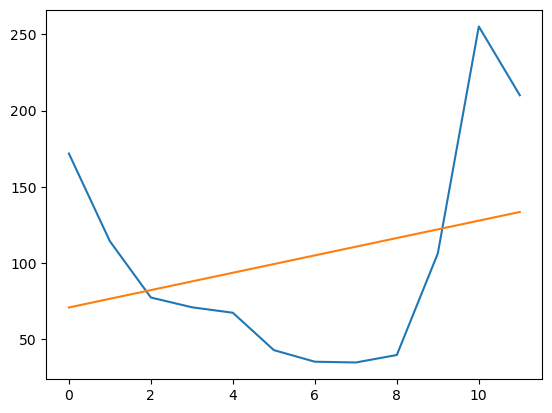

In [45]:
test_model['Y'].plot(kind = 'line')
test_model['linear_pred_Trend_test'].plot(kind = 'line')

In [46]:
test_model['linear_SI_test'] = test_model['Y'] - test_model['linear_pred_Trend_test']

In [47]:
test_model

,X,Y,linear_pred_Trend_test,linear_SI_test
0,25,171.8,70.862821,100.937179
1,26,114.3,76.554429,37.745571
2,27,77.4,82.246037,-4.846037
3,28,71.0,87.937646,-16.937646
4,29,67.4,93.629254,-26.229254
5,30,42.9,99.320862,-56.420862
6,31,35.3,105.012471,-69.712471
7,32,34.8,110.704079,-75.904079
8,33,39.7,116.395688,-76.695688
9,34,106.3,122.087296,-15.787296


In [48]:
test_model['Month_component_test'] =list(range(1,13)) 

In [49]:
test_model_seasonal_monthly_component = test_model.groupby('Month_component_test')['linear_SI_test'].mean()

In [50]:
test_model_seasonal_monthly_component

Month_component_test
1     100.937179
2      37.745571
3      -4.846037
4     -16.937646
5     -26.229254
6     -56.420862
7     -69.712471
8     -75.904079
9     -76.695688
10    -15.787296
11    127.321096
12     76.529487
Name: linear_SI_test, dtype: float64

In [51]:
test_model

,X,Y,linear_pred_Trend_test,linear_SI_test,Month_component_test
0,25,171.8,70.862821,100.937179,1
1,26,114.3,76.554429,37.745571,2
2,27,77.4,82.246037,-4.846037,3
3,28,71.0,87.937646,-16.937646,4
4,29,67.4,93.629254,-26.229254,5
5,30,42.9,99.320862,-56.420862,6
6,31,35.3,105.012471,-69.712471,7
7,32,34.8,110.704079,-75.904079,8
8,33,39.7,116.395688,-76.695688,9
9,34,106.3,122.087296,-15.787296,10


In [52]:
Average_Seasonality_Factor1 = pd.DataFrame(test_model_seasonal_monthly_component[test_model['Month_component_test']]).reset_index()

In [53]:
Average_Seasonality_Factor1.columns = ["Month_component_test", "Average_Seasonality_Factor1"]

In [54]:
Average_Seasonality_Factor1

,Month_component_test,Average_Seasonality_Factor1
0,1,100.937179
1,2,37.745571
2,3,-4.846037
3,4,-16.937646
4,5,-26.229254
5,6,-56.420862
6,7,-69.712471
7,8,-75.904079
8,9,-76.695688
9,10,-15.787296


In [55]:
test_model['Average_Seasonality_Factor1'] = Average_Seasonality_Factor1['Average_Seasonality_Factor1']

In [56]:
test_model

,X,Y,linear_pred_Trend_test,linear_SI_test,Month_component_test,Average_Seasonality_Factor1
0,25,171.8,70.862821,100.937179,1,100.937179
1,26,114.3,76.554429,37.745571,2,37.745571
2,27,77.4,82.246037,-4.846037,3,-4.846037
3,28,71.0,87.937646,-16.937646,4,-16.937646
4,29,67.4,93.629254,-26.229254,5,-26.229254
5,30,42.9,99.320862,-56.420862,6,-56.420862
6,31,35.3,105.012471,-69.712471,7,-69.712471
7,32,34.8,110.704079,-75.904079,8,-75.904079
8,33,39.7,116.395688,-76.695688,9,-76.695688
9,34,106.3,122.087296,-15.787296,10,-15.787296


In [57]:
test_model['Actual_Prediction_test'] = test_model['linear_pred_Trend_test'] + test_model['Average_Seasonality_Factor1']

In [58]:
test_model

,X,Y,linear_pred_Trend_test,linear_SI_test,Month_component_test,Average_Seasonality_Factor1,Actual_Prediction_test
0,25,171.8,70.862821,100.937179,1,100.937179,171.8
1,26,114.3,76.554429,37.745571,2,37.745571,114.3
2,27,77.4,82.246037,-4.846037,3,-4.846037,77.4
3,28,71.0,87.937646,-16.937646,4,-16.937646,71.0
4,29,67.4,93.629254,-26.229254,5,-26.229254,67.4
5,30,42.9,99.320862,-56.420862,6,-56.420862,42.9
6,31,35.3,105.012471,-69.712471,7,-69.712471,35.3
7,32,34.8,110.704079,-75.904079,8,-75.904079,34.8
8,33,39.7,116.395688,-76.695688,9,-76.695688,39.7
9,34,106.3,122.087296,-15.787296,10,-15.787296,106.3


In [59]:
print("Linear Prediction MAPE by test method: ")
print(mean_absolute_percentage_error(test_model['Y'],test_model['linear_pred_Trend_test'] ))
print("Linear with Seasonality Prediction MAPE by test method")
print(mean_absolute_percentage_error(test_model['Y'],test_model['Actual_Prediction_test'] ))

Linear Prediction MAPE by test method: 
0.835266155524646
Linear with Seasonality Prediction MAPE by test method
0.0


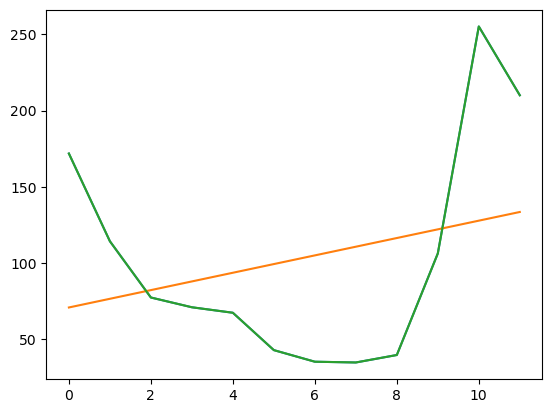

In [60]:
test_model['Y'].plot(kind = 'line')
test_model['linear_pred_Trend_test'].plot(kind = 'line')
test_model['Actual_Prediction_test'].plot(kind = 'line')
plt.show()